In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss

In [60]:
cohort_size = 1000

In [79]:
smoking_low_bound = (25, 35, 45, 55, 65, 75)
smoking_upper_boundary = (34, 44, 54, 64, 74, 85)
p_smoking = (19, 22, 16, 12, 15, 11, 6) #19

In [88]:
def is_woman_smoking(age):  
    i, p_index = 0, 0
    sections = list(zip(smoking_low_bound, smoking_upper_bound))

    for section in sections:
        if section[0] <= age <= section[1]:
            p_index = i
            break
        i += 1
    print(p_index)
    return ss.bernoulli(p=p_smoking[p_index]/100).rvs()

In [87]:
is_woman_smoking(30)

0


1

In [106]:
def create_height():
    height = ss.norm(loc=162, scale= 7).rvs()
    return int(height)

In [105]:
create_height()

156

In [107]:
def create_weight():
    weight = ss.norm(loc=62, scale=9).rvs()
    return int(weight)

In [108]:
create_weight()

66

In [109]:
marriage_low_bound = [25, 30, 35, 40, 45, 50]
marriage_upper_bound = [29, 34, 39, 44, 49, 85]
p_marriage = [27, 35, 20, 6, 4, 5]

In [ ]:
def first_marriage(age):
    sections = list(zip(marriage_low_bound, marriage_upper_bound))
    p_index, i = 0, 0
    for section in sections:
        if section[0] <= age <= section[1]:
            p_index = i
            break
        i += 1
    marriage_low_bound_loc = marriage_low_bound[:p_index]
    marriage_upper_bound_loc = marriage_upper_bound[:p_index]
    new_sections = list(zip(marriage_low_bound_loc, marriage_upper_bound_loc))
    p_marriage_loc = p_marriage[:p_index]


In [ ]:
class Woman():
    def __init__():
        self.age = np.random.randint(low=25, high=85)
        self.smoking = is_woman_smoking(self.age)
        self.height = create_height()
        self.weight = create_weight()



In [34]:
age = np.random.randint(100, size=cohort_size)

In [ ]:
age

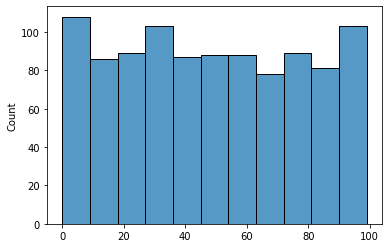

In [36]:
sns.histplot(data=age)

In [37]:
df =pd.DataFrame(data={'age':age})

In [38]:
df.head(5)

,age
0,80
1,91
2,3
3,67
4,69


In [39]:
smoking = np.zeros(cohort_size)

In [ ]:
smoking

In [41]:
j = 0
for i in age:

    if i < 16:
        j += 1
        continue

    elif 16 <= i <= 24:
        p = np.random.randint(100, size=1)
        if p <= 19:
            smoking[j] = 1
        j += 1
        continue
    
    elif 25 <= i <= 34:
        p = np.random.randint(100, size=1)
        if p <= 22:
            smoking[j] = 1
        j += 1
        continue
    
    elif 35 <= i <= 44:
        p = np.random.randint(100, size=1)
        if p <= 16:
            smoking[j] = 1
        j += 1
        continue

    elif 45 <= i <= 54:
        p = np.random.randint(100, size=1)
        if p <= 12:
            smoking[j] = 1
        j += 1
        continue

    elif 55 <= i <= 64:
        p = np.random.randint(100, size=1)
        if p <= 15:
            smoking[j] = 1
        j += 1
        continue

    elif 65 <= i <= 74:
        p = np.random.randint(100, size=1)
        if p <= 11:
            smoking[j] = 1
        j += 1
        continue

    elif 75 <= i:
        p = np.random.randint(100, size=1)
        if p <= 6:
            smoking[j] = 1
        j += 1
        continue


In [42]:
smoking

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
df['smoking'] = smoking

In [44]:
df.head(5)

,age,smoking
0,80,0.0
1,91,0.0
2,3,0.0
3,67,0.0
4,69,0.0


In [51]:
first_marriage = np.zeros(cohort_size)

In [ ]:
first_marriage

In [54]:
j = 0
for i in age:

    if i < 18:
        if np.random.randint(100) <= 1:
            first_marriage[j] = 17
        j += 1
    
    elif 18 <= i <= 19:
        # if np.random.randint(100) <= 4:
        if np.random.randint(100) <= 5:
            first_marriage[j] = np.random.randint(low=18, high=20)
        j += 1
    
    elif 20 <= i <= 24:
        # if np.random.randint(100) <= 20:
        if np.random.randint(100) <= 25:
            first_marriage[j] = np.random.randint(low=20, high=25)
        j += 1
    
    elif 25 <= i <= 29:
        if np.random.randint(100) <= 60:
            first_marriage[j] = np.random.randint(low=25, high=30)
        j += 1
    
    elif 30 <= i <= 34:
        if np.random.randint(100) <= 20:
            first_marriage[j] = np.random.randint(low=30, high=35)
        j += 1
    
    elif 35 <= i <= 39:
        if np.random.randint(100) <= 9:
            first_marriage[j] = np.random.randint(low=35, high=40)
        j += 1

    elif 40 <= i <= 44:
        if np.random.randint(100) <= 4:
            first_marriage[j] = np.random.randint(low=40, high=45)
        j += 1

    elif 45 <= i <= 49:
        if np.random.randint(100) <= 2:
            first_marriage[j] = np.random.randint(low=45, high=50)
        j += 1

    elif 50 <= i:
        if np.random.randint(100) <= 5:
            first_marriage[j] = np.random.randint(low=50, high=100)
        j += 1


In [55]:
first_marriage

array([85.,  0.,  0.,  0.,  0., 33.,  0., 67.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.,  0., 20.,
        0.,  0.,  0.,  0.,  0.,  0., 29.,  0.,  0.,  0., 28.,  0., 27.,
        0., 43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 29.,  0.,  0.,  0.,  0., 35.,  0., 51.,  0.,  0.,  0.,
        0.,  0., 50., 22.,  0.,  0., 89.,  0.,  0.,  0.,  0.,  0., 23.,
        0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 26.,
        0.,  0., 23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., 26.,  0.,  0.,  0., 32.,  0.,  0.,  0., 28.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., 28.,  0., 26.,  0.,  0.,  0., 90., 67.,
        0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 85.,  0.,  0., 28.,  0.,  0., 25.,  0

In [31]:
5 + 2 + 4 + 9 + 20 + 35 + 20 + 4 + 1

100